In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import RTLearner as rt
import DTLearner as dt
import BagLearner as bl
import LinRegLearner as lr
%matplotlib inline  

In [2]:
data=pd.read_csv('Data/Istanbul.csv')
data=data.drop(data.columns[0], axis=1)
data=np.array(data, dtype=np.float32)

traintestsplit=math.floor(data.shape[0]*0.6)

np.random.shuffle(data)
training, test = data[:traintestsplit,:], data[traintestsplit:,:]

trainX=training[:,:-1]
trainY=training[:,-1]

testX = test[:,:-1]
testY = test[:,-1]

In [10]:
leaves=(range(80))

In [44]:
i=0
in_first_RMSE=np.ones(len(leaves))
out_first_RMSE=np.ones(len(leaves))

for leaf_size in leaves:
    first_learner = dt.DTLearner(leaf_size=leaf_size, verbose = False)
    first_learner.addEvidence(trainX, trainY)
    Y_preds_in = first_learner.query(trainX)
    Y_preds_out = first_learner.query(testX)
    in_first_RMSE[i] = math.sqrt(((trainY - Y_preds_in) ** 2).mean())
    out_first_RMSE[i] = math.sqrt(((testY - Y_preds_out) ** 2).mean())
    i+=1

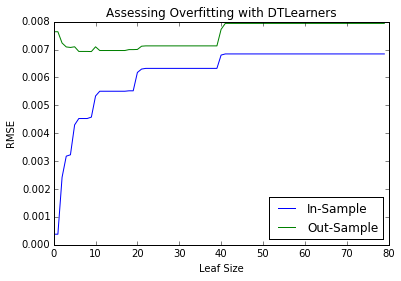

In [49]:
plt.plot(leaves, in_first_RMSE,  label='In-Sample')
plt.plot(leaves, out_first_RMSE,  label='Out-Sample')
plt.title("Assessing Overfitting with DTLearners")
plt.ylabel('RMSE')
plt.xlabel('Leaf Size')
plt.legend(loc="lower right")
plt.show()

In [38]:
df0=pd.DataFrame(leaves, columns=['Leaf_size'])
df1=pd.DataFrame(in_first_RMSE, columns=['In-Sample RMSE'])
df2=pd.DataFrame(out_first_RMSE, columns=['Out-Sample RMSE'])
frames=[df0, df1,df2]
result=pd.concat(frames, axis=1)

In the dataset Istanbul.csv with DTLearner, overfitting occurs when the leaf_size increases after leaf size is set to 9. The dataset was randomly shuffled and split into Training and Testing sets. After training the learner on the training sets, I ran the learner on the training set (in-sample) and on the test set (out-of-sample). 

To determine where the learner overfits, I used Root Mean Square Error (RMSE) as a metric. Looking at chart and the table, it's clear that In-Sample RMSE is strictly increasing, and it makes sense. A leaf size of 1 for In-Sample RMSE is very close to 0 (0.000380) because the data is very well-fit. As the leaf_size increases, the model becomes more generic and not as precise when fitting the data.  

For the Out-of-Sample trained learner, leaf_size of 1 does not yield a good fit, because the model was built on the train set. As the leaf_size increases, its RMSE decreases, meaning the trainer fits better. 

After a certain point (when leaf_size=9), RMSE for both in-sample and out-of-sample learners increase becasue as leaf_size gets bigger, the model becomes generic. 

Overfitting would occur when the In-Sample RMSE is decreasing and the Out-of-sample RMSE is increasing. 

In [39]:
print result[:30]

    Leaf_size  In-Sample RMSE  Out-Sample RMSE
0           0        0.000380         0.007637
1           1        0.000380         0.007637
2           2        0.002418         0.007232
3           3        0.003177         0.007092
4           4        0.003226         0.007073
5           5        0.004298         0.007098
6           6        0.004526         0.006930
7           7        0.004526         0.006930
8           8        0.004526         0.006930
9           9        0.004576         0.006926
10         10        0.005333         0.007096
11         11        0.005504         0.006963
12         12        0.005504         0.006963
13         13        0.005504         0.006963
14         14        0.005504         0.006963
15         15        0.005504         0.006963
16         16        0.005504         0.006963
17         17        0.005504         0.006963
18         18        0.005519         0.006996
19         19        0.005519         0.006996
20         20

In [33]:
in_second_RMSE=np.ones(len(leaves))
out_second_RMSE=np.ones(len(leaves))

j=0

for leaf_size in leaves:
    second_learner=bl.BagLearner(learner=dt.DTLearner, kwargs={"leaf_size" :leaf_size, "verbose": False}, bags=20, boost=False, verbose=False)
    second_learner.addEvidence(trainX, trainY)

    Y_preds_in = second_learner.query(trainX)
    Y_preds_out = second_learner.query(testX)
    in_second_RMSE[j] = math.sqrt(((trainY - Y_preds_in) ** 2).mean())
    out_second_RMSE[j] = math.sqrt(((testY - Y_preds_out) ** 2).mean())


    j+=1

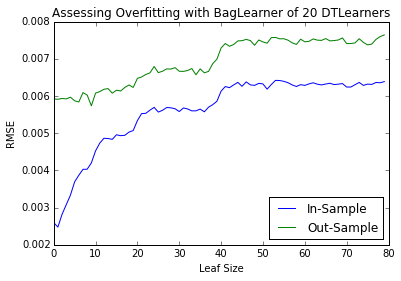

In [20]:
plt.plot(leaves, in_second_RMSE,  label='In-Sample')
plt.plot(leaves, out_second_RMSE,  label='Out-Sample')
plt.title("Assessing Overfitting with BagLearner of 20 DTLearners")
plt.ylabel('RMSE')
plt.xlabel('Leaf Size')
plt.legend(loc="lower right")
plt.show()

In [40]:
df3=pd.DataFrame(leaves, columns=['Leaf_size'])
df4=pd.DataFrame(in_second_RMSE, columns=['In-Sample RMSE'])
df5=pd.DataFrame(out_second_RMSE, columns=['Out-Sample RMSE'])
frames1=[df3,df4, df5]
result1=pd.concat(frames1, axis=1)

Bagging reduces overfitting with respect to leaf_size. We tested 20 bags of DT Learners against the Istanbul.csv dataset, while varying the leaf_size. 

Creating an ensemble learner resulted in lower errors than just training a single Decision Tree Learner. 0.005801 was the lowest RMSE while training on ensemble learners, while 0.006930 was the lowest RMSE when trained on a single Decision Tree. The Ensemble of learners typically does not overfit as much as any individual learner by itself. 

Each kind of learner that an own intrinsic bias. But when put together, they tend to reduce the individual biases. 

In [41]:
print result1[:20]

    Leaf_size  In-Sample RMSE  Out-Sample RMSE
0           0        0.002552         0.006127
1           1        0.002619         0.006035
2           2        0.002805         0.005868
3           3        0.002980         0.005974
4           4        0.003262         0.005801
5           5        0.003670         0.005871
6           6        0.003982         0.005923
7           7        0.003988         0.005866
8           8        0.004050         0.005948
9           9        0.004187         0.006011
10         10        0.004528         0.006183
11         11        0.004711         0.005985
12         12        0.004787         0.006174
13         13        0.004816         0.005882
14         14        0.004812         0.006114
15         15        0.004830         0.005945
16         16        0.004919         0.006166
17         17        0.004934         0.006143
18         18        0.005023         0.006236
19         19        0.005167         0.006498


In [52]:
k=0
in_third_RMSE=np.ones(len(leaves))
out_third_RMSE=np.ones(len(leaves))

for leaf_size in leaves:
    third_learner = rt.RTLearner(leaf_size=leaf_size, verbose = False)
    third_learner.addEvidence(trainX, trainY)
    Y_preds_in = third_learner.query(trainX)
    Y_preds_out = third_learner.query(testX)
    in_third_RMSE[k] = math.sqrt(((trainY - Y_preds_in) ** 2).mean())
    out_third_RMSE[k] = math.sqrt(((testY - Y_preds_out) ** 2).mean())

    k+=1

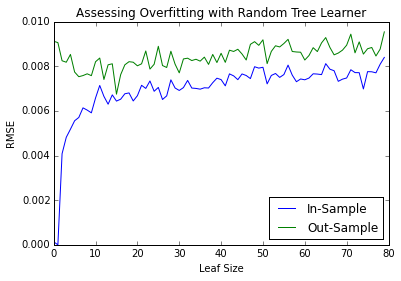

In [57]:
plt.plot(leaves, in_third_RMSE,  label='In-Sample')
plt.plot(leaves, out_third_RMSE,  label='Out-Sample')
plt.title("Assessing Overfitting with Random Tree Learner")
plt.ylabel('RMSE')
plt.xlabel('Leaf Size')
plt.legend(loc="lower right")
plt.show()

In [54]:
df6=pd.DataFrame(leaves, columns=['Leaf_size'])
df7=pd.DataFrame(in_third_RMSE, columns=['In-Sample RMSE'])
df8=pd.DataFrame(out_third_RMSE, columns=['Out-Sample RMSE'])

frames2=[df6,df7,df8]
result2=pd.concat(frames2, axis=1)

In [55]:
print result2[:30]

    Leaf_size  In-Sample RMSE  Out-Sample RMSE
0           0        0.000133         0.009120
1           1        0.000000         0.009059
2           2        0.004080         0.008246
3           3        0.004815         0.008180
4           4        0.005179         0.008530
5           5        0.005557         0.007741
6           6        0.005705         0.007531
7           7        0.006135         0.007582
8           8        0.006035         0.007661
9           9        0.005912         0.007578
10         10        0.006579         0.008201
11         11        0.007139         0.008367
12         12        0.006650         0.007407
13         13        0.006300         0.008065
14         14        0.006717         0.008109
15         15        0.006439         0.006749
16         16        0.006523         0.007622
17         17        0.006767         0.008063
18         18        0.006805         0.008204
19         19        0.006444         0.008180
20         20

* Quantitatively compare "classic" decision trees (DTLearner) versus random trees (RTLearner). In which ways is one method better than the other?

Decision tree learners 
Random tree learners 0.007496

-Compare 2 quantitative properties